In [12]:
import overpass
from IPython.display import display
import geopandas as gpd

def get_point_data(node_name: str, area_name: str, api: overpass.API, date: str = None):
    query = ""
    # if date is not None: # to jeszcze nie dziala :(
    #     query += f'[date:"{date}"];'
    # else:
    #     query += ''
    query += f'''
    area["name"="{area_name}"]->.a;
    (
        node["{node_name}"](area.a);
    );
    out center;
    '''
    resp = api.get(query)
    nodes = []
    for node in resp['features']:
        x, y = node["geometry"]["coordinates"]
        node_geom = gpd.points_from_xy([x], [y])[0]
        name = node["properties"][node_name]
        nodes.append({"geometry": node_geom, "type": name})
    return nodes

api = overpass.API()
node_names = ['amenity', 'building', 'highway', 'public_transport', 'government', 'leisure', 'office', 'natural']
area_name = 'Virginia Beach'
date = '2019-01-01T00:00:00Z'
amenities = get_point_data(node_names[0], area_name, api)
buildings = get_point_data(node_names[1], area_name, api)
highways = get_point_data(node_names[2], area_name, api)
public_transport = get_point_data(node_names[3], area_name, api)
government = get_point_data(node_names[4], area_name, api)
leisure = get_point_data(node_names[5], area_name, api)
office = get_point_data(node_names[6], area_name, api)
natural = get_point_data(node_names[7], area_name, api)

In [13]:

# combine features into one category
# leisure = [{'geometry': item['geometry'], 'type': 'leisure'} for item in leisure]
# building_categories = {
#     'accomodation': {'apartments', 'barracks', 'bungalow', 'cabin', 'detached', 'dormitory', 'farm', 'ger', 'hotel', 'house', 'houseboat', 'residential', 'semidetached_house', 'static_caravan', 'stilt_house', 'terrace', 'tree_house', 'trullo'},
#     'commercial': {'commercial', 'industrial', 'kiosk', 'office', 'retail', 'supermarket', 'warehouse'},
#     'religious': {'cathedral', 'chapel', 'church', 'kingdom_hall', 'monastery', 'mosque', 'presbytery', 'religious', 'shrine', 'synagogue', 'temple'},
#     'civic': {'bakehouse', 'bridge', 'civic', 'college', 'fire_station', 'government', 'gatehouse', 'hospital', 'kindergarten', 'museum', 'public', 'school', 'toilets', 'train_station', 'transportation', 'university'},
#     'agricultural': {'barn', 'conservatory', 'cowshed', 'farm_auxiliary', 'greenhouse', 'slurry_tank', 'stable', 'sty', 'livestock'},
#     'sports': {'grandstand', 'pavilion', 'riding_hall', 'sports_hall', 'sports_centre', 'stadium'},
#     'storage': {'allotment_house', 'boathouse', 'hangar', 'hut', 'shed'},
#     'cars': {'carport', 'garage', 'garages', 'parking'},
#     'power': {'digester', 'service', 'tech_cab', 'transformer_tower', 'water_tower', 'storage_tank', 'silo'},
#     'other': {'beach_hut', 'bunker', 'castle', 'construction', 'container', 'guardhouse', 'military', 'outbuilding', 'pagoda', 'quonset_hut', 'roof', 'ruins', 'tent', 'tower', 'windmill'}
# }

# ammenity_categories = {
#     'sustenance': {'bar', 'biergarten', 'cafe', 'fast_food', 'food_court', 'ice_cream', 'pub', 'restaurant'},
#     'education': {'college', 'dancing_school', 'driving_school', 'first_aid_school', 'kindergarten', 'language_school', 'library', 'surf_school', 'toy_library', 'research_institute', 'training', 'music_school', 'school', 'traffic_park', 'university'},
#     'transportation': {'bicycle_parking', 'bicycle_repair_station', 'bicycle_rental', 'bicycle_wash', 'boat_rental', 'boat_sharing', 'bus_station', 'car_rental', 'car_sharing', 'car_wash', 'compressed_air', 'vehicle_inspection', 'charging_station', 'driver_training', 'ferry_terminal', 'fuel', 'grit_bin', 'motorcycle_parking', 'parking', 'parking_entrance', 'parking_space', 'taxi', 'weighbridge'},
#     'financial': {'atm', 'payment_terminal', 'bank', 'bureau_de_change'},
#     'healthcare': {'baby_hatch', 'clinic', 'dentist', 'doctors', 'hospital', 'nursing_home', 'pharmacy', 'social_facility', 'veterinary'},
#     'entertainment': {'arts_centre', 'brothel', 'casino', 'cinema', 'community_centre', 'conference_centre', 'events_venue', 'exhibition_centre', 'fountain', 'gambling', 'love_hotel', 'music_venue', 'nightclub', 'planetarium', 'public_bookcase', 'social_centre', 'stripclub', 'studio', 'swingerclub', 'theatre'},
#     'public_service': {'courthouse', 'fire_station', 'police', 'post_box', 'post_depot', 'post_office', 'prison', 'ranger_station', 'townhall'},
#     'facilities': {'bbq', 'bench', 'dog_toilet', 'dressing_room', 'drinking_water', 'give_box', 'mailroom', 'parcel_locker', 'shelter', 'shower', 'telephone', 'toilets', 'water_point', 'watering_place'},
#     'waste_management': {'sanitary_dump_station', 'recycling', 'waste_basket', 'waste_disposal', 'waste_transfer_station'},
# }

# def reverse_dict(d):
#     new_d = {}
#     for category in d:
#         for amenity_type in d[category]:
#             new_d[amenity_type] = category
#     return new_d

# building_dict = reverse_dict(building_categories)
# amenity_dict = reverse_dict(ammenity_categories)

# def change_types(type_dict: dict, data: list, default='other'):
#     for data_dict in data:
#         if data_dict['type'] in type_dict:
#             data_dict['type'] = type_dict[data_dict['type']]
#         else:
#             data_dict['type'] = default

# change_types(building_dict, buildings, 'other_building')
# change_types(amenity_dict, amenities, 'other_amenity')

# create gdf from amenities
# update amenities with changed building types
amenities.extend(highways)
amenities.extend(buildings)
# update amenities with raw category types
amenities.extend(leisure)
amenities.extend(office)
amenities.extend(government)
amenities.extend(public_transport)
# amenities.extend(natural)
features_gdf = gpd.GeoDataFrame(data=[{'name': amen['type']} for amen in amenities], geometry=[amen['geometry'] for amen in amenities], crs='EPSG:4326')
print(features_gdf.head())
# print number of unique names
print(len(features_gdf['name'].unique()))

               name                    geometry
0  place_of_worship  POINT (-76.04799 36.70960)
1        grave_yard  POINT (-76.01854 36.59043)
2  place_of_worship  POINT (-76.08286 36.58601)
3  place_of_worship  POINT (-76.07354 36.55765)
4            school  POINT (-76.02160 36.59710)
123


In [14]:
# import data from VBOHCAR.xlsx to a pandas dataframe
import io
import pandas as pd
import requests
from os import listdir

# check for the vbohcar.xlsx file in the current directory
if 'VBOHCAR.xlsx' in listdir():
        # read the third sheet of the excel file
    df = pd.read_excel('VBOHCAR.xlsx', sheet_name=3)
else:
    # clone the excel file from github
    url = 'https://github.com/INFORMSJoC/2020.1022/blob/master/results/VBOHCAR.xlsx?raw=true'
    file = requests.get(url)
    file_bytes = io.BytesIO(file.content)
    # read the third sheet of the excel file
    df = pd.read_excel(file_bytes, sheet_name=3)

# convert the pandas dataframe to a geopandas dataframe and add a geometry column with crs set
ohca_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')

# delete unused columns
columns_to_drop = ['Incident_Location', 'MinimumResponseTime', 'ReceivedTime', 'ID_OHCA', 'X_OHCA', 'Y_OHCA', 'Z_OHCA']
for column in columns_to_drop:
    if column in ohca_gdf.columns:
        del ohca_gdf[column]

print(ohca_gdf.head())

    Latitude  Longitude                    geometry
0  36.862471 -76.024169  POINT (-76.02417 36.86247)
1  36.766897 -76.042337  POINT (-76.04234 36.76690)
2  36.766897 -76.042337  POINT (-76.04234 36.76690)
3  36.905880 -76.118769  POINT (-76.11877 36.90588)
4  36.620850 -76.090090  POINT (-76.09009 36.62085)


In [15]:
import h3

# create a dict hexagon_amenities = {hexagon_id: {amenity_name: count}}
hexagon_amenities = {}
for amen_dict in features_gdf.iterrows():
    amenity = amen_dict[1]['name']
    hexagon = h3.geo_to_h3(amen_dict[1]['geometry'].y, amen_dict[1]['geometry'].x, 9)
    if hexagon in hexagon_amenities:
        hexagon_amenities[hexagon][amenity] += 1
    else:
        hexagon_amenities[hexagon] = {}
        for amenity in features_gdf['name'].unique():
            hexagon_amenities[hexagon][amenity] = 0
        hexagon_amenities[hexagon][amenity] += 1

# convert to a dataframe
# amenity_name, amenity_name2, amenity_name3, ...
# count, count2, count3, ...
hexagon_amenities_df = pd.DataFrame(hexagon_amenities).T

# count ohca in each hexagon
hexagon_ohca = {}
for ohca in ohca_gdf.iterrows():
    hexagon = h3.geo_to_h3(ohca[1]['geometry'].y, ohca[1]['geometry'].x, 9)
    if hexagon in hexagon_ohca:
        hexagon_ohca[hexagon] += 1
    else:
        hexagon_ohca[hexagon] = 1

# add ohca count to the hexagon_amenities_df
hexagon_amenities_df['ohca_count'] = [hexagon_ohca[h] if h in hexagon_ohca else 0 for h in hexagon_amenities_df.index]
display(hexagon_amenities_df.head())

,place_of_worship,grave_yard,school,post_office,childcare,university,courthouse,fire_station,library,police,...,tax_advisor,consulting,financial_advisor,camping,import_export_company,administrative,environment,stop_position,platform,ohca_count
892af0c9adbffff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
892af052a6bffff,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
892af051c37ffff,1,2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,1
892af0519b3ffff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
892af0501b3ffff,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# create a map, color hexagons by the predicted number of ohca
import folium

# create a map
m = folium.Map(location=[36.8529, -75.9780], zoom_start=11)

# add hexagons with opacity based on the number of ohca
for hexagon in hexagon_amenities_df.index:
    # get ohca from the hexagon_amenities_df
    ohca = hexagon_amenities_df.loc[hexagon, 'ohca_count']
    opacity = ohca / 10
    color = 'red'
    locs = [(pos[0], pos[1]) for pos in h3.h3_to_geo_boundary(hexagon)]
    # create a polygon from the hexagon
    folium.Polygon(locations=locs, color=color, fill_color=color, fill_opacity=opacity).add_to(m)

m

In [17]:
import numpy as np

def add_neighbour_counts(hexagon_amenities_df: pd.DataFrame, feature_gdf: gpd.GeoDataFrame) -> pd.DataFrame:
    # Get unique features
    unique_features = feature_gdf['name'].unique()

    # Create new columns for each unique feature
    for amenity in unique_features:
        new_columns = pd.DataFrame({f"{amenity}_neighbour_count": 0}, index=hexagon_amenities_df.index)
        hexagon_amenities_df = pd.concat([hexagon_amenities_df, new_columns], axis=1)

    # Iterate through hexagon_amenities_df index
    for h in hexagon_amenities_df.index:
        neighbours = np.array(list(h3.k_ring(h, 1)))  # Convert set to array
        common_indices = np.intersect1d(neighbours, hexagon_amenities_df.index)
        
        # Increment the counts using vectorized operations
        hexagon_amenities_df.loc[h, unique_features + '_neighbour_count'] += hexagon_amenities_df.loc[common_indices, unique_features].values.sum(axis=0)

    # Ensure integer type for the new columns
    hexagon_amenities_df[unique_features + '_neighbour_count'] = hexagon_amenities_df[unique_features + '_neighbour_count'].astype(int)
    return hexagon_amenities_df
# unique_features = features_gdf['name'].unique()

# # Create new columns for each unique feature
# for amenity in unique_features:
#     new_columns = pd.DataFrame({f"{amenity}_neighbour_count": 0}, index=hexagon_amenities_df.index)
#     hexagon_amenities_df = pd.concat([hexagon_amenities_df, new_columns], axis=1)

# # Iterate through hexagon_amenities_df index
# for h in hexagon_amenities_df.index:
#     neighbours = np.array(list(h3.k_ring(h, 1)))  # Convert set to array
#     common_indices = np.intersect1d(neighbours, hexagon_amenities_df.index)
    
#     # Increment the counts using vectorized operations
#     hexagon_amenities_df.loc[h, unique_features + '_neighbour_count'] += hexagon_amenities_df.loc[common_indices, unique_features].values.sum(axis=0)

# # Ensure integer type for the new columns
# hexagon_amenities_df[unique_features + '_neighbour_count'] = hexagon_amenities_df[unique_features + '_neighbour_count'].astype(int)

hexagon_amenities_df = add_neighbour_counts(hexagon_amenities_df, features_gdf)
display(hexagon_amenities_df.head())


,place_of_worship,grave_yard,school,post_office,childcare,university,courthouse,fire_station,library,police,...,healthcare_neighbour_count,tax_advisor_neighbour_count,consulting_neighbour_count,financial_advisor_neighbour_count,camping_neighbour_count,import_export_company_neighbour_count,administrative_neighbour_count,environment_neighbour_count,stop_position_neighbour_count,platform_neighbour_count
892af0c9adbffff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
892af052a6bffff,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
892af051c37ffff,1,2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,3
892af0519b3ffff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
892af0501b3ffff,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# use xgboost to predict ohca count
from xgboost import XGBRegressor
from tpot import TPOTRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error


data_len = len(hexagon_amenities_df)
n = 5
mean_rme = 0
mean_avg_err = 0
for i in range(n):
    # shuffle data
    hexagon_amenities_df = hexagon_amenities_df.sample(frac=1).reset_index(drop=True)

    # split data into X and y
    X = hexagon_amenities_df.drop(columns=['ohca_count'])
    y = hexagon_amenities_df['ohca_count']

    # split data into train and test sets
    start = int(data_len / n * i)
    end = int(data_len / n * (i + 1))
    X_test = X[start:end]
    y_test = y[start:end]
    X_train = X.drop(X.index[start:end])
    y_train = y.drop(y.index[start:end])
    # fit model no training data
    model = XGBRegressor()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, 0, np.inf)
    avg_ohca = np.mean(y_train)
    avg_pred = np.full(len(y_pred), avg_ohca)
    mean_error = mean_squared_error(y_test, y_pred, squared=False)
    mean_rme += mean_error
    avg_err = mean_squared_error(y_test, avg_pred, squared=False)
    mean_avg_err += avg_err
    print(f"Mean error: \t\t\t{mean_error:.3f}")
    avg_pred_err = mean_squared_error(y_test, avg_pred, squared=False)
    print(f"Error for predicting average: \t{avg_pred_err:.3f}")

print(f"Mean mean error: {(mean_rme / n):.3f}")
print(f"Mean error for predicting average: {(mean_avg_err / n):.3f}")
if mean_rme < mean_avg_err :
    print(f"{model.__class__.__name__} is better than predicting average by {((mean_avg_err - mean_rme)/n):.3f}!!")
else:
    print(f"{model.__class__.__name__} is worse than predicting average by {((mean_rme - mean_avg_err)/n):.3f} :(")


Mean error: 			2.702
Error for predicting average: 	2.314
Mean error: 			2.058
Error for predicting average: 	1.963
Mean error: 			2.841
Error for predicting average: 	2.716
Mean error: 			1.909
Error for predicting average: 	1.816
Mean error: 			2.264
Error for predicting average: 	2.234
Mean mean error: 2.355
Mean error for predicting average: 2.209
XGBRegressor is worse than predicting average by 0.146 :(


In [1]:
# now try tpot
model = TPOTRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

NameError: name 'TPOTRegressor' is not defined

In [ ]:

def weighted_diff(X_test: pd.DataFrame, y_test: pd.Series, y_pred: np.array) -> float:
    # combine X_test and y_test into one dataframe
    # add y_pred to the dataframe
    df = pd.concat([X_test, y_test], axis=1)

    # add a ohca_pred columnwith values rounded
    df['ohca_pred'] = np.int32(np.round(y_pred, 0))

    # convert to a dict {hexagon_id: predicted_ohca_count}
    hexagon_ohca_pred = {}
    for row in df.iterrows():
        hexagon = row[0]
        ohca_pred = row[1]['ohca_pred']
        hexagon_ohca_pred[hexagon] = ohca_pred

    # do the same for ohca_count
    hexagon_ohca_count = {}
    for row in df.iterrows():
        hexagon = row[0]
        ohca_count = row[1]['ohca_count']
        hexagon_ohca_count[hexagon] = ohca_count

    # print the difference between the predicted and actual number of ohca
    diff = 0
    for hexagon in hexagon_ohca_pred:
        diff += abs(hexagon_ohca_pred[hexagon] - hexagon_ohca_count[hexagon])
    # print(f"Total difference: {diff}")
    max_pred = max(hexagon_ohca_pred.values())
    max_count = max(hexagon_ohca_count.values())
    # print(f"Max predicted: {max_pred}")
    # print(f"Max count: {max_count}")
    # reduce values in hexagon_ohca_count to match the max value in hexagon_ohca_pred
    hexagon_ohca_count = {hexagon: min(hexagon_ohca_count[hexagon], max_pred, max_count) for hexagon in hexagon_ohca_count}
    # print(max(hexagon_ohca_count.values()))
    diff = 0
    for hexagon in hexagon_ohca_pred:
        diff += abs(hexagon_ohca_pred[hexagon] - hexagon_ohca_count[hexagon]) * (hexagon_ohca_count[hexagon] / max_pred)
    return diff

# run the weighted_diff test for n different train/test splits
n = 5
# repeat m times
m = 20
mean_weighted_diff = 0
for _ in range(m):
    # shuffle data
    hexagon_amenities_df = hexagon_amenities_df.sample(frac=1).reset_index(drop=True)
    for i in range(n):


        # split data into X and y
        X = hexagon_amenities_df.drop(columns=['ohca_count'])
        y = hexagon_amenities_df['ohca_count']

        # split data into train and test sets
        start = int(data_len / n * i)
        end = int(data_len / n * (i + 1))
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = X.drop(X.index[start:end])
        y_train = y.drop(y.index[start:end])
        # fit model no training data
        # add params to the model
        model = XGBRegressor(max_depth=10)
        model.fit(X_train, y_train)

        # make predictions for test data
        y_pred = model.predict(X_test)
        y_pred = np.maximum(y_pred, 0)
        mean_weighted_diff += weighted_diff(X_test, y_test, y_pred)

print(f"Mean weighted diff: {(mean_weighted_diff / (n * m)):.3f}")

Mean weighted diff: 91.412


In [ ]:

# now try tpot
model = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
model.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: -4.1235470135477374
                                                                              
Generation 2 - Current best internal CV score: -4.1235470135477374
                                                                              
                                                                              
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.1, min_samples_leaf=9, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [ ]:
# predict ohca count for each hexagon
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)
print(f"Weighted diff: {weighted_diff(X_test, y_test, y_pred):.3f}")

Weighted diff: 162.250


In [ ]:
# get feature importances
feature_importances = model.feature_importances_
# sort indices by importance
indices = np.argsort(feature_importances)
# get feature names
feature_names = X.columns
# sort feature names by importance
feature_names = feature_names[indices]
# get feature importances sorted
feature_importances = feature_importances[indices]
# create a dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
# display the dataframe
display(feature_importances_df)

,feature,importance
0,golf_course,0.000000
1,dog_park,0.000000
2,sports_centre,0.000000
3,accountant_neighbour_count,0.000000
4,nature_reserve,0.000000
...,...,...
241,sports_centre_neighbour_count,0.028919
242,childcare_neighbour_count,0.029076
243,financial_neighbour_count,0.043207
244,place_of_worship,0.137835


In [ ]:
# other model comparison
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.linear_model import TueilSenRegressor
from sklearn.model_selection import train_test_split

models = [
    XGBRegressor(objective='reg:squarederror'),
    LinearRegression(),
    Ridge(),
    Lasso(),
    BayesianRidge(),
    ElasticNet(),
    LassoLars(),
    OrthogonalMatchingPursuit(),
    # TheilSenRegressor(),
    GradientBoostingRegressor(),
]
# shuffle data
hexagon_amenities_df = hexagon_amenities_df.sample(frac=1).reset_index(drop=True)
X = hexagon_amenities_df.drop(columns=['ohca_count'])
y = hexagon_amenities_df['ohca_count']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
min_model = models[0]
min_error = np.inf
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, 0, np.inf)
    mean_error = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Model: {model.__class__.__name__} Mean error: {mean_error:.4f}")
    if mean_error < min_error:
        min_error = mean_error
        min_model = model

print(f"Min error: {min_error:.4f}")
print(f"Min model: {min_model}")

Model: XGBRegressor Mean error: 2.3433
Model: LinearRegression Mean error: 2.4812
Model: Ridge Mean error: 2.2626
Model: Lasso Mean error: 2.1928
Model: BayesianRidge Mean error: 2.1891
Model: ElasticNet Mean error: 2.1822
Model: LassoLars Mean error: 2.1928
Model: OrthogonalMatchingPursuit Mean error: 2.1677
Model: GradientBoostingRegressor Mean error: 2.2684
Min error: 2.1677
Min model: OrthogonalMatchingPursuit()


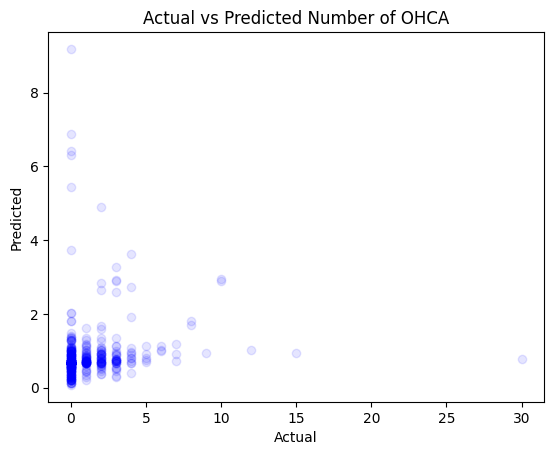

In [ ]:
# show predictions vs actual
import matplotlib.pyplot as plt
# color based on density of points on the graph
plt.scatter(y_test, y_pred, c='b', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Number of OHCA')
plt.show()

In [ ]:
# get point data for warsaw
area_name = 'Warsaw'
warsaw_amenities = get_point_data(node_names[0], area_name, api)
warsaw_buildings = get_point_data(node_names[1], area_name, api)
warsaw_highways = get_point_data(node_names[2], area_name, api)
warsaw_public_transport = get_point_data(node_names[3], area_name, api)
warsaw_government = get_point_data(node_names[4], area_name, api)
warsaw_leisure = get_point_data(node_names[5], area_name, api)
warsaw_office = get_point_data(node_names[6], area_name, api)

warsaw_amenities.extend(warsaw_buildings)
warsaw_amenities.extend(warsaw_highways)
warsaw_amenities.extend(warsaw_public_transport)
warsaw_amenities.extend(warsaw_government)
warsaw_amenities.extend(warsaw_leisure)
warsaw_amenities.extend(warsaw_office)

# create gdf from amenities
# update amenities with changed building types
# update amenities with raw category types
warsaw_features_gdf = gpd.GeoDataFrame(data=[{'name': amen['type']} for amen in warsaw_amenities], geometry=[amen['geometry'] for amen in warsaw_amenities], crs='EPSG:4326')
# print number of unique names


In [ ]:
# create a dict hexagon_amenities = {hexagon_id: {amenity_name: count}}
warsaw_hexagon_amenities = {}
for amen_dict in warsaw_features_gdf.iterrows():
    amenity = amen_dict[1]['name']
    hexagon = h3.geo_to_h3(amen_dict[1]['geometry'].y, amen_dict[1]['geometry'].x, 9)
    if hexagon in warsaw_hexagon_amenities:
        warsaw_hexagon_amenities[hexagon][amenity] += 1
    else:
        warsaw_hexagon_amenities[hexagon] = {}
        for amenity in warsaw_features_gdf['name'].unique():
            warsaw_hexagon_amenities[hexagon][amenity] = 0
        warsaw_hexagon_amenities[hexagon][amenity] += 1
    
# convert to a dataframe
# amenity_name, amenity_name2, amenity_name3, ...
# count, count2, count3, ...
warsaw_hexagon_amenities_df = pd.DataFrame(warsaw_hexagon_amenities).T

# add neighbour counts
warsaw_hexagon_amenities_df = add_neighbour_counts(warsaw_hexagon_amenities_df, warsaw_features_gdf)
display(warsaw_hexagon_amenities_df.head())

NameError: name 'warsaw_features_gdf' is not defined

In [ ]:
# remove columns that are not in the training data
for column in warsaw_hexagon_amenities_df.columns:
    if column not in hexagon_amenities_df.columns:
        del warsaw_hexagon_amenities_df[column]

# remove columns that are not in the data to predict
for column in hexagon_amenities_df.columns:
    if column not in warsaw_hexagon_amenities_df.columns and column != 'ohca_count':
        del hexagon_amenities_df[column]
display(warsaw_hexagon_amenities_df.head())
display(hexagon_amenities_df.head())
    
# train model
model = XGBRegressor(max_depth=10)
X = hexagon_amenities_df.drop(columns=['ohca_count'])
y = hexagon_amenities_df['ohca_count']
model.fit(X, y)

# predict
X = warsaw_hexagon_amenities_df
y_pred = model.predict(X)
y_pred = np.maximum(y_pred, 0)

# create a map, color hexagons by the predicted number of ohca
import folium

m = folium.Map(location=[52.2297, 21.0122], zoom_start=11)

# add hexagons with opacity based on the number of ohca
for hexagon in warsaw_hexagon_amenities_df.index:
    # get ohca from the hexagon_amenities_df
    ohca = warsaw_hexagon_amenities_df.loc[hexagon, 'ohca_count']
    opacity = ohca / 10
    color = 'red'
    locs = [(pos[0], pos[1]) for pos in h3.h3_to_geo_boundary(hexagon)]
    # create a polygon from the hexagon
    folium.Polygon(locations=locs, color=color, fill_color=color, fill_opacity=opacity).add_to(m)

m

NameError: name 'warsaw_hexagon_amenities_df' is not defined